In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neurodsp.spectral import compute_spectrum_welch
from neurodsp.plts import plot_time_series, plot_power_spectra
from fooof.plts.spectra import plot_spectrum, plot_spectra
from fooof.plts.fm import plot_fm
from glob import glob
from scipy import signal
from utils import *
from fooof import FOOOF
from fooof.core.funcs import gaussian_function
from fooof.sim import gen_freqs
from fooof.analysis import get_band_peak_fm
from fooof.plts.periodic import plot_peak_fits

In [3]:
# read the data
data = sorted(glob('data/w12_18_spont/lfp*.ibw'))
# get 1st probe data
files_1st_probe = [d for d in data if int(d.split('/')[-1].split('.')[0].split('p')[-1]) >= 65 and int(d.split('/')[-1].split('.')[0].split('p')[-1]) <= 80]
# get 2nd probe data
files_2st_probe = [d for d in data if int(d.split('/')[-1].split('.')[0].split('p')[-1]) >= 97 and int(d.split('/')[-1].split('.')[0].split('p')[-1]) <= 112]

# load the data
data_1st_probe = [load_data(f) for f in files_1st_probe]
data_2st_probe = [load_data(f) for f in files_2st_probe]

# get the sampling rate
fs = data_1st_probe[0].sampling_rate

# get the time series
ts_1st_probe = [np.squeeze(d.magnitude) for d in data_1st_probe]
ts_2nd_probe = [np.squeeze(d.magnitude) for d in data_2st_probe]

In [4]:
# filter the data
ts_1st_probe_filtered = [filter_line_noise(ts, fs, 550) for ts in ts_1st_probe]
ts_2nd_probe_filtered = [filter_line_noise(ts, fs, 550) for ts in ts_2nd_probe]

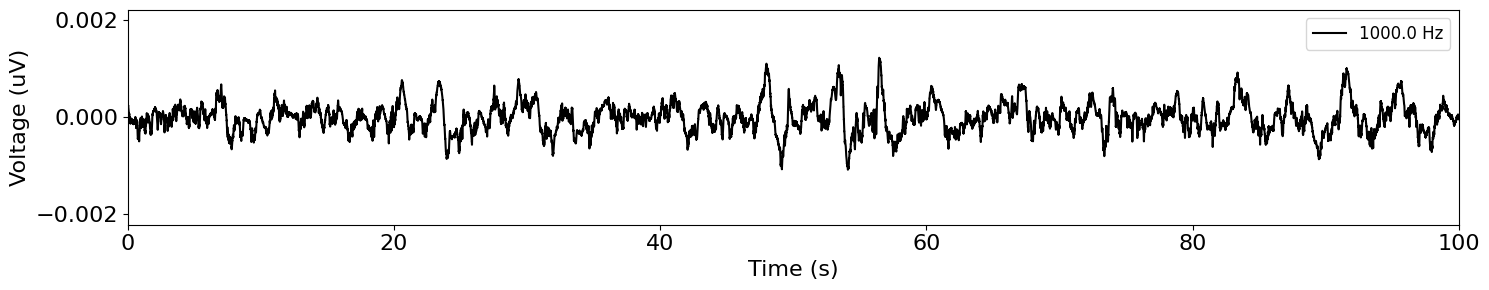

In [11]:
# plot time series
ts_1st_probe_times = [np.squeeze(d.times) for d in data_1st_probe]
plot_time_series(ts_1st_probe_times[5], ts_1st_probe_filtered[5], fs, xlim=[0, 100])

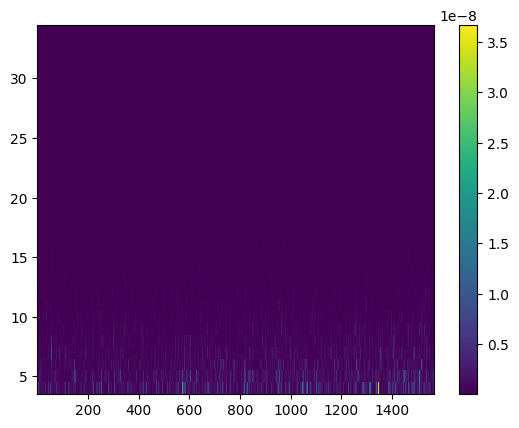

In [17]:
f, t, spec = signal.spectrogram(ts_1st_probe_filtered[13], fs=1000, nperseg=1000, noverlap=900)
ids = np.where((f < 35) & (f > 3))
spec = spec[ids]
f = f[ids]
plt.pcolormesh(t, f, spec)
plt.colorbar()

In [25]:
# viewer = napari.Viewer()

data_list = []
for i in range(len(ts_1st_probe_filtered)):
    f, t, spec = signal.spectrogram(ts_2nd_probe_filtered[i], fs=1000, nperseg=1000, noverlap=900)
    ids = np.where((f < 100) & (f > 3))
    spec = spec[ids]
    # add the image
    spec = np.array(spec)
    data = np.zeros((spec.shape[0], int(spec.shape[1]/100)))
    # cycle through the spec and average each 100 data points
    for i in range(spec.shape[0]):
        for j in range(int(spec.shape[1]/100)):
            data[i, j] = np.mean(spec[i, j*100:(j+1)*100])
    data_list.append(data)

data_list = np.array(data_list)
# viewer.add_image(data_list, colormap='gist_earth', name='spectrogram')


<Image layer 'spectrogram [1]' at 0x7fcdaa9a2e90>